# **Exploring the Relationship Between RSSI Signals and Ambient Temperature**

**Giorgio Fratti**

Environmental Monitoring and Management

University of Milano-Bicocca, University of Milano Statale, University of Pavia

**ABSTRACT**

*The exploration of the relationship between RSSI signals and ambient temperature is crucial for optimizing various systems reliant on radio signals. RSSI, or Received Signal Strength Indicator, is a metric widely utilized across diverse fields to gauge the strength of received radio signals, aiding in assessing signal quality and proximity of transmitting devices. Its significance extends to localization systems, particularly in indoor settings where it often outperforms GPS due to its reliability. Moreover, the energy efficiency of low-power wireless technologies used in RSSI makes them viable for outdoor localization, ideal for battery-powered devices.
In this study, we delve into a dataset comprising RSSI measurements alongside temperature data, aiming to uncover potential correlations between them. Such insights are invaluable for enhancing the performance of RSSI-based systems, contributing to improved signal coverage, and energy optimization.*



## Introduction

In this study, we leverage a dataset sourced from the paper: [Correlation between weather and signal strength in LoRaWAN networks: An extensive dataset](https://doi.org/10.1016/j.comnet.2021.108627). The dataset encompasses over 2000 hourly RSSI measurements originating from 8 distinct LoRaWAN nodes, all transmitted by a singular gateway. Additionally, temperature data spanning an 85-day period within a 12km^2 region supplements the RSSI readings.

Our objective is to investigate potential correlations between the RSSI measurements and ambient temperature. To accomplish this, we commence with a preliminary analysis of the dataset, focusing on basic statistical metrics. Subsequently, we employ various visualization techniques to identify any discernible patterns or trends within the data.

Furthermore, we employ an Ordinary Least Squares (OLS) model to probe for relationships between the RSSI readings and temperature. Through Linear Regression, we not only seek correlations but also endeavor to predict temperature values based on the 8 RSSI readings from the nodes. Our exploration extends to enhancing this predictive framework using Neural Networks, aiming to refine our understanding of the relationship between RSSI signals and ambient temperature.

## DATA ANALYSIS

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import pandas as pd

# Loading data
data = pd.read_csv('/content/drive/MyDrive/EMM/emanueleg lora-rssi master vineyard-2021_data/combined_hourly_data.csv', sep=';')
data.head()

,timestamp,temp,hum,bar,rain,RSSI_01,RSSI_02,RSSI_03,RSSI_04,RSSI_05,...,RSSI_07,RSSI_08,SNR_01,SNR_02,SNR_03,SNR_04,SNR_05,SNR_06,SNR_07,SNR_08
0,1605520800,10.550000,77.333333,1018.083333,0.25,-56.333333,-73.333333,-67.166667,-76.200000,-71.666667,...,-64.000000,NaN,8.875000,8.125000,8.041667,8.350000,8.458333,8.541667,7.950000,NaN
1,1605524400,10.716667,77.000000,1017.416667,0.00,-56.700000,-74.416667,-68.250000,-77.833333,-71.833333,...,-64.000000,NaN,8.900000,8.979167,8.770833,8.875000,8.937500,9.125000,9.041667,NaN
2,1605528000,11.216667,77.666667,1016.933333,0.00,-56.750000,-73.916667,-67.416667,-77.583333,-72.083333,...,-63.750000,NaN,9.104167,8.541667,8.354167,8.854167,8.479167,8.729167,8.500000,NaN
3,1605531600,11.700000,80.500000,1016.450000,0.00,-56.916667,-75.750000,-67.750000,-77.416667,-71.916667,...,-64.083333,NaN,9.000000,8.791667,8.729167,8.770833,8.812500,8.875000,8.791667,NaN
4,1605535200,12.016667,81.666667,1016.616667,0.00,-57.000000,-75.818182,-67.454545,-79.166667,-73.000000,...,-62.727273,NaN,9.145833,8.659091,8.431818,8.437500,8.625000,8.795455,8.068182,NaN


In [3]:
df = data.copy()
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
RSSI_features = ['RSSI_01', 'RSSI_02', 'RSSI_03', 'RSSI_04', 'RSSI_05', 'RSSI_06', 'RSSI_07', 'RSSI_08']
df = df[['timestamp', 'temp', 'RSSI_01', 'RSSI_02', 'RSSI_03', 'RSSI_04', 'RSSI_05', 'RSSI_06', 'RSSI_07', 'RSSI_08']]
df.set_index('timestamp', inplace=True)
df.describe()

,temp,RSSI_01,RSSI_02,RSSI_03,RSSI_04,RSSI_05,RSSI_06,RSSI_07,RSSI_08
count,2029.000000,2029.000000,2029.000000,2028.000000,2028.000000,2028.000000,2028.000000,2029.000000,1879.000000
mean,4.570999,-55.877248,-80.777758,-67.326980,-77.367213,-71.173228,-63.225102,-61.810408,-83.225550
std,3.303357,1.125597,3.644798,0.999133,1.845865,3.424635,4.447837,0.855001,3.711532
min,-4.266667,-58.181818,-92.666667,-70.166667,-84.416667,-81.750000,-80.750000,-67.363636,-92.583333
25%,1.983333,-56.666667,-83.166667,-68.083333,-78.500000,-73.416667,-65.854167,-62.333333,-85.784091
50%,4.650000,-56.166667,-81.000000,-67.416667,-77.250000,-70.651515,-62.750000,-61.818182,-82.500000
75%,7.083333,-55.181818,-78.181818,-66.666667,-76.166667,-68.583333,-60.727273,-61.250000,-80.750000
max,15.350000,-51.916667,-71.250000,-63.666667,-71.000000,-62.000000,-53.545455,-58.272727,-69.625000


- The temperature values range from around -4.27°C to 15.35°C, with a mean of approximately 4.57°C and a standard deviation of 3.30°C. The 25th percentile temperature is around 1.98°C, while the 75th percentile temperature is about 7.08°C. This indicates that the majority of temperature readings fall within this range.

- Each RSSI source shows different signal strengths, as indicated by their mean and standard deviation values.
RSSI_01 has the strongest signal on average (-55.88 dB), while RSSI_08 has the weakest signal on average (-83.23 dB). This also depends on the distance from the gateway.

- There are discrepancies in the count of RSSI readings, with RSSI_08 having fewer readings compared to others (1879 readings compared to 2029).

- Variability in RSSI values (standard deviation) could suggest fluctuations or inconsistencies in signal strength over time.

- There is typically an inverse relationship between distance and signal strength (RSSI). As the distance from the transmitter increases, the signal strength tends to decrease. This relationship is not strictly linear and can be influenced by various factors such as obstacles, interference, and environmental conditions.



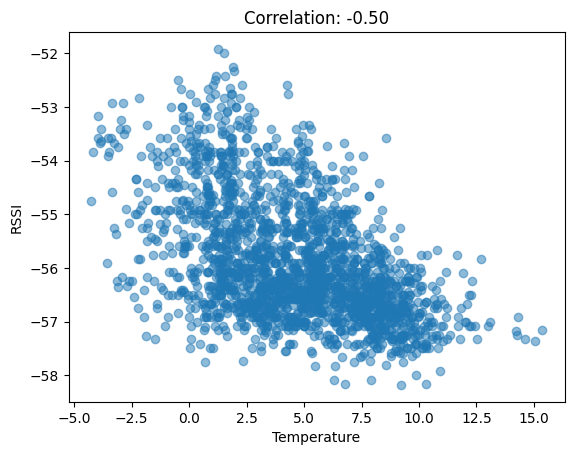

In [4]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with columns 'Temperature' and 'RSSI'

# Calculate correlation coefficient
correlation = data['temp'].corr(data['RSSI_01'])

# Plot the correlation
plt.scatter(data['temp'], data['RSSI_01'], alpha=0.5)
plt.title(f'Correlation: {correlation:.2f}')
plt.xlabel('Temperature')
plt.ylabel('RSSI')
plt.show()


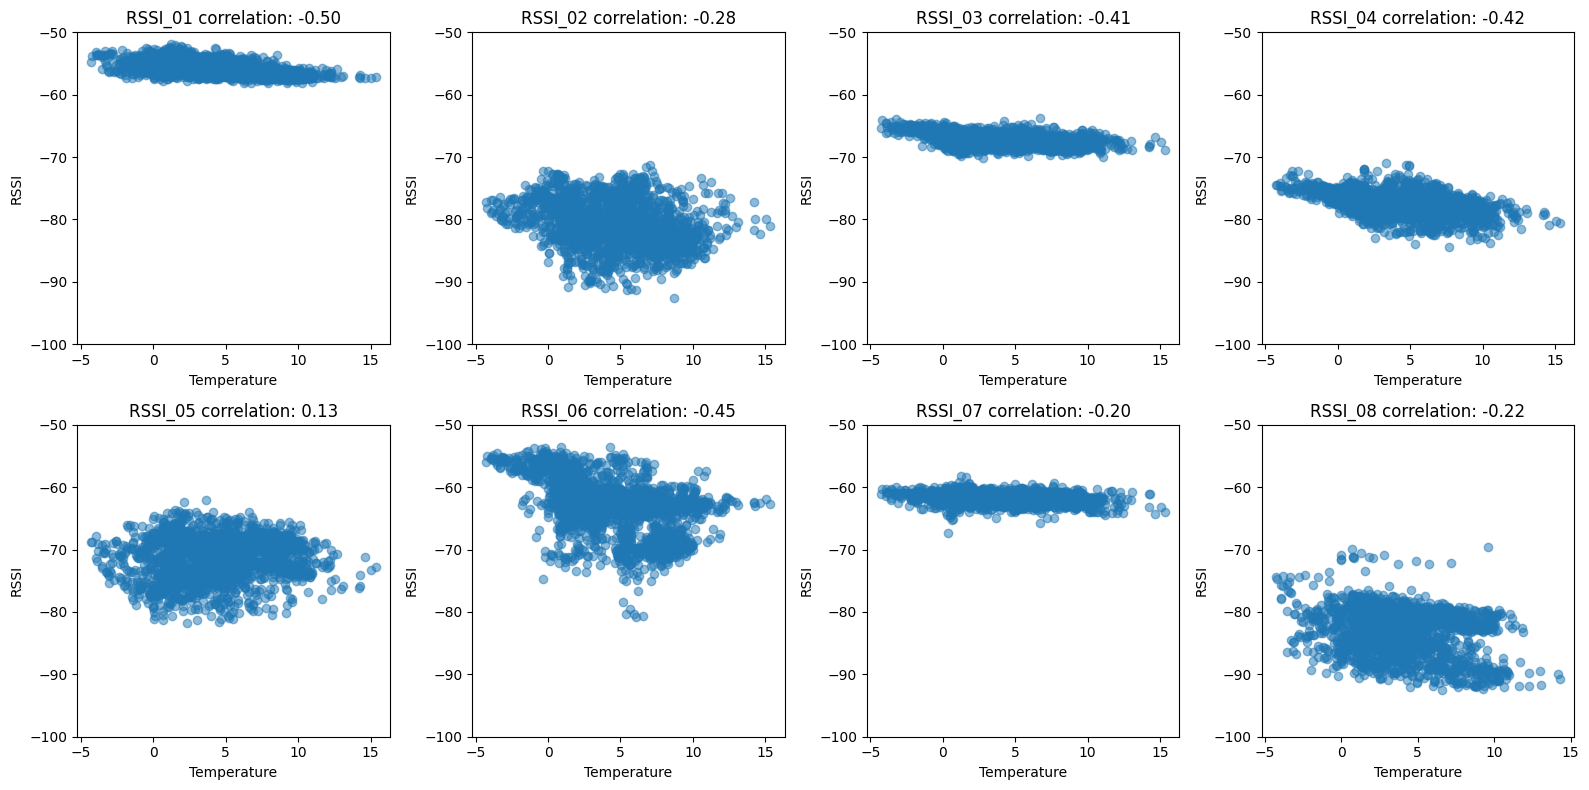

In [5]:

fig, axs = plt.subplots(2, 4, figsize=(16, 8))  # 2 rows, 4 columns

# Flatten the axs array for easier access
axs = axs.flatten()

# Plot each subplot
for i in range(8):
    correlation = data['temp'].corr(data[f'RSSI_0{i+1}'])
    # Example plotting, replace this with your data
    axs[i].scatter(data['temp'], data[f'RSSI_0{i+1}'], alpha=0.5)
    axs[i].set_title(f'RSSI_0{i+1} correlation: {correlation:.2f}')
    axs[i].set_xlabel('Temperature')
    axs[i].set_ylabel('RSSI')
    axs[i].set_ylim(-100, -50)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()


Looking at the previous graphs it seems that there could be a weak/moderate correlation. Especially on the nodes that are closer to the gateway (node 1 and node 6).

The negative correlation mean that when the temperature increase, the RSSI decrease so it seems that the signals propagates better with colder temperatures.

## Other features

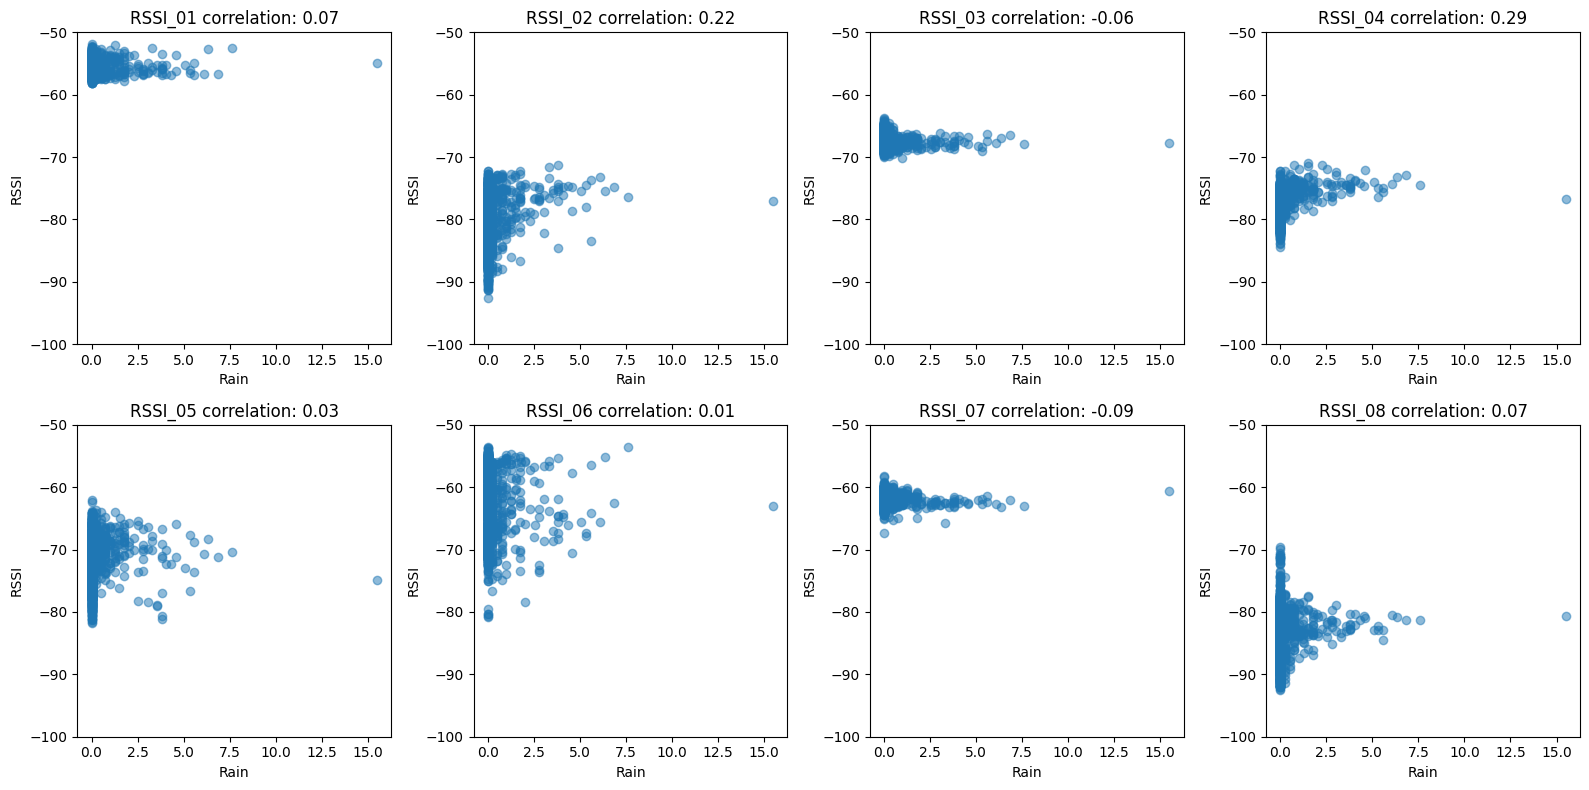

In [6]:

fig, axs = plt.subplots(2, 4, figsize=(16, 8))  # 2 rows, 4 columns

# Flatten the axs array for easier access
axs = axs.flatten()

# Plot each subplot
for i in range(8):
    correlation = data['rain'].corr(data[f'RSSI_0{i+1}'])
    # Example plotting, replace this with your data
    axs[i].scatter(data['rain'], data[f'RSSI_0{i+1}'], alpha=0.5)
    axs[i].set_title(f'RSSI_0{i+1} correlation: {correlation:.2f}')
    axs[i].set_xlabel('Rain')
    axs[i].set_ylabel('RSSI')
    axs[i].set_ylim(-100, -50)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

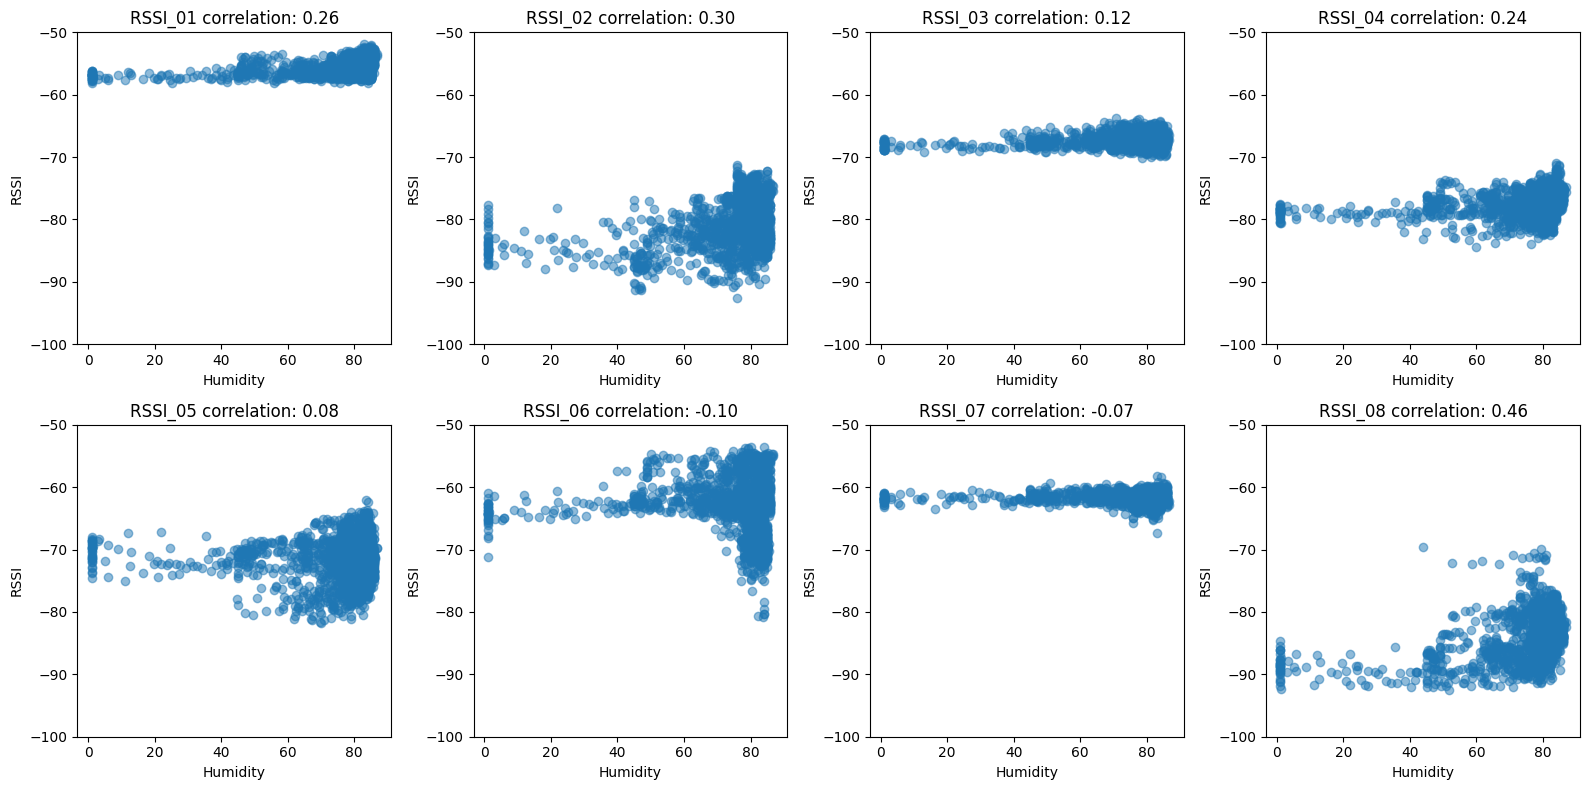

In [7]:

fig, axs = plt.subplots(2, 4, figsize=(16, 8))  # 2 rows, 4 columns

# Flatten the axs array for easier access
axs = axs.flatten()

# Plot each subplot
for i in range(8):
    correlation = data['hum'].corr(data[f'RSSI_0{i+1}'])
    # Example plotting, replace this with your data
    axs[i].scatter(data['hum'], data[f'RSSI_0{i+1}'], alpha=0.5)
    axs[i].set_title(f'RSSI_0{i+1} correlation: {correlation:.2f}')
    axs[i].set_xlabel('Humidity')
    axs[i].set_ylabel('RSSI')
    axs[i].set_ylim(-100, -50)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

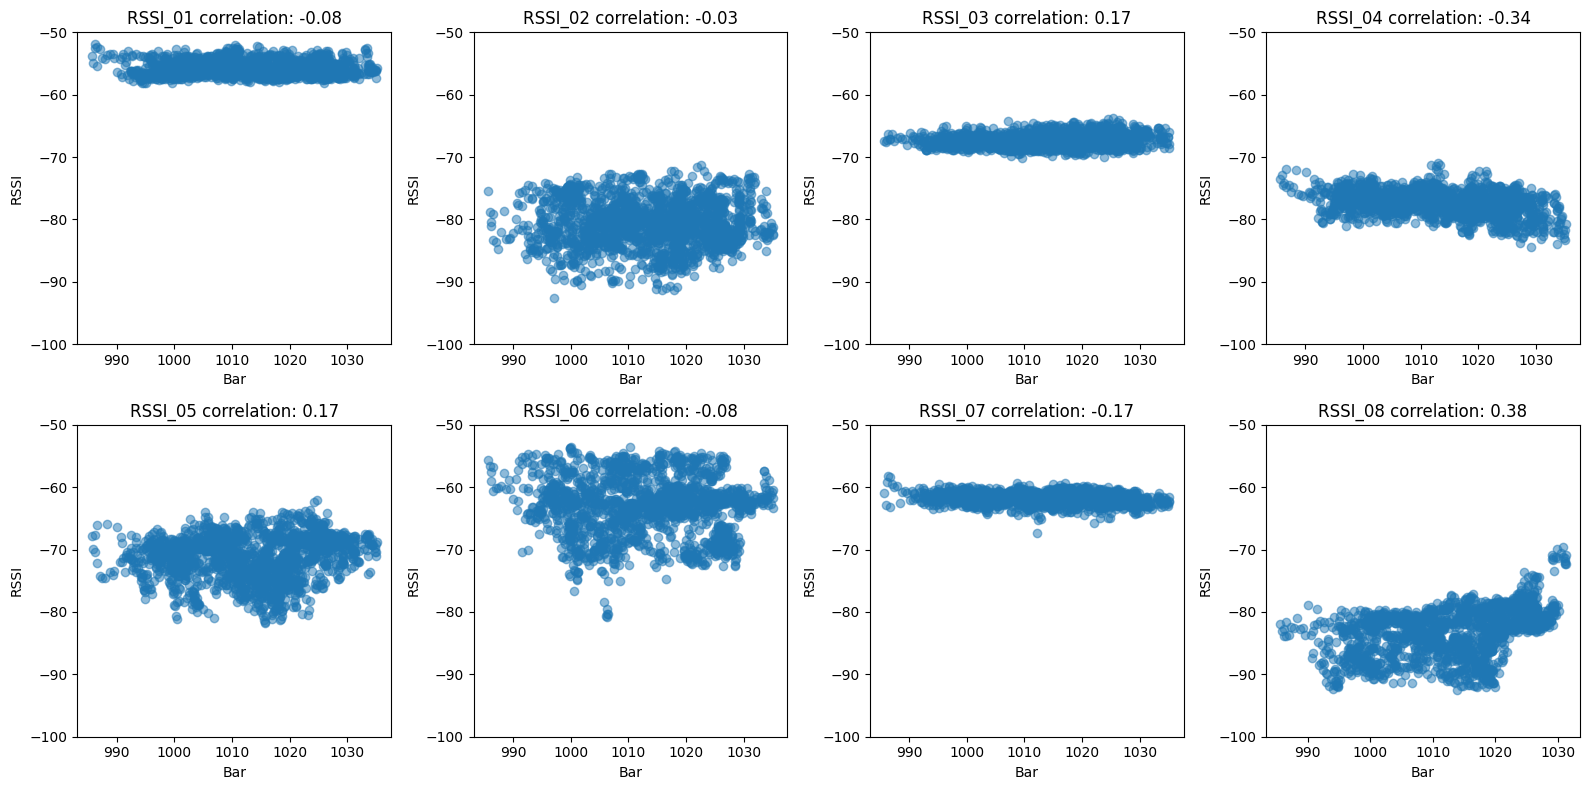

In [8]:

fig, axs = plt.subplots(2, 4, figsize=(16, 8))  # 2 rows, 4 columns

# Flatten the axs array for easier access
axs = axs.flatten()

# Plot each subplot
for i in range(8):
    correlation = data['bar'].corr(data[f'RSSI_0{i+1}'])
    # Example plotting, replace this with your data
    axs[i].scatter(data['bar'], data[f'RSSI_0{i+1}'], alpha=0.5)
    axs[i].set_title(f'RSSI_0{i+1} correlation: {correlation:.2f}')
    axs[i].set_xlabel('Bar')
    axs[i].set_ylabel('RSSI')
    axs[i].set_ylim(-100, -50)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

## Hourly and day by day measurements

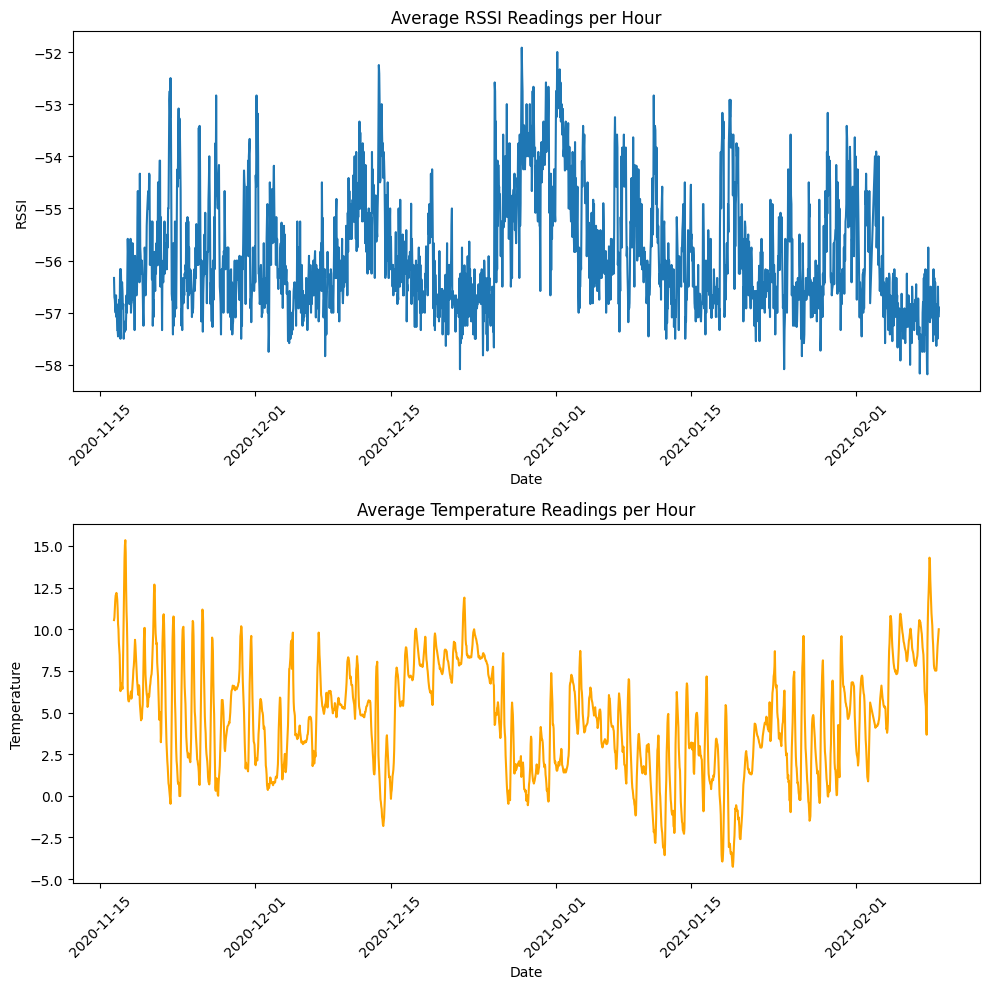

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Resample temperature data to daily intervals and calculate mean temperature for each day
daily_temp = df['temp'].resample('H').mean()

# Resample RSSI data to daily intervals and calculate mean RSSI for each day
daily_rssi = df['RSSI_01'].resample('H').mean()

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Plot RSSI measurements
sns.lineplot(data=daily_rssi.to_frame(), x=daily_rssi.index, y='RSSI_01', ax=axes[0])
axes[0].set_title('Average RSSI Readings per Hour')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('RSSI')
axes[0].tick_params(axis='x', rotation=45)

# Plot temperature measurements
sns.lineplot(data=daily_temp.to_frame(), x=daily_temp.index, y='temp', ax=axes[1], color='orange')
axes[1].set_title('Average Temperature Readings per Hour')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Temperature')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


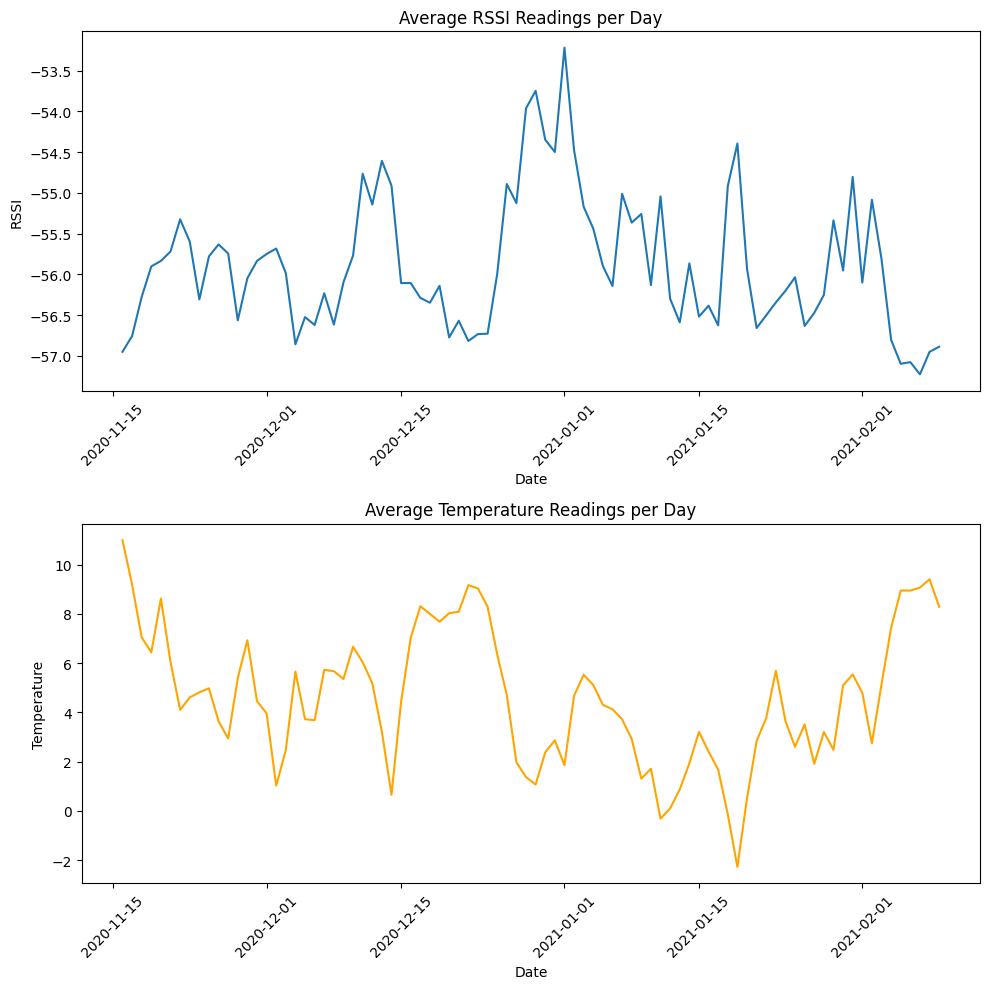

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Resample temperature data to daily intervals and calculate mean temperature for each day
daily_temp = df['temp'].resample('D').mean()

# Resample RSSI data to daily intervals and calculate mean RSSI for each day
daily_rssi = df['RSSI_01'].resample('D').mean()

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Plot RSSI measurements
sns.lineplot(data=daily_rssi.to_frame(), x=daily_rssi.index, y='RSSI_01', ax=axes[0])
axes[0].set_title('Average RSSI Readings per Day')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('RSSI')
axes[0].tick_params(axis='x', rotation=45)

# Plot temperature measurements
sns.lineplot(data=daily_temp.to_frame(), x=daily_temp.index, y='temp', ax=axes[1], color='orange')
axes[1].set_title('Average Temperature Readings per Day')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Temperature')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


Even by looking at the previous graphs we can have cues of some sort of negative correlations. Especially on the graph presenting the measurements aggregated by day it's evident that when the temperature increases, the RSSI signal degrades.

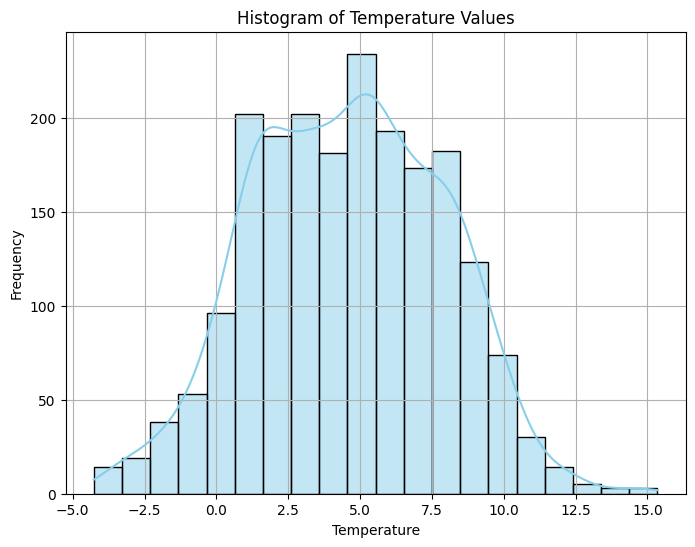

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming temp_df is your DataFrame containing temperature values

# Plot histogram of temperature values
plt.figure(figsize=(8, 6))
sns.histplot(df['temp'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of Temperature Values')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


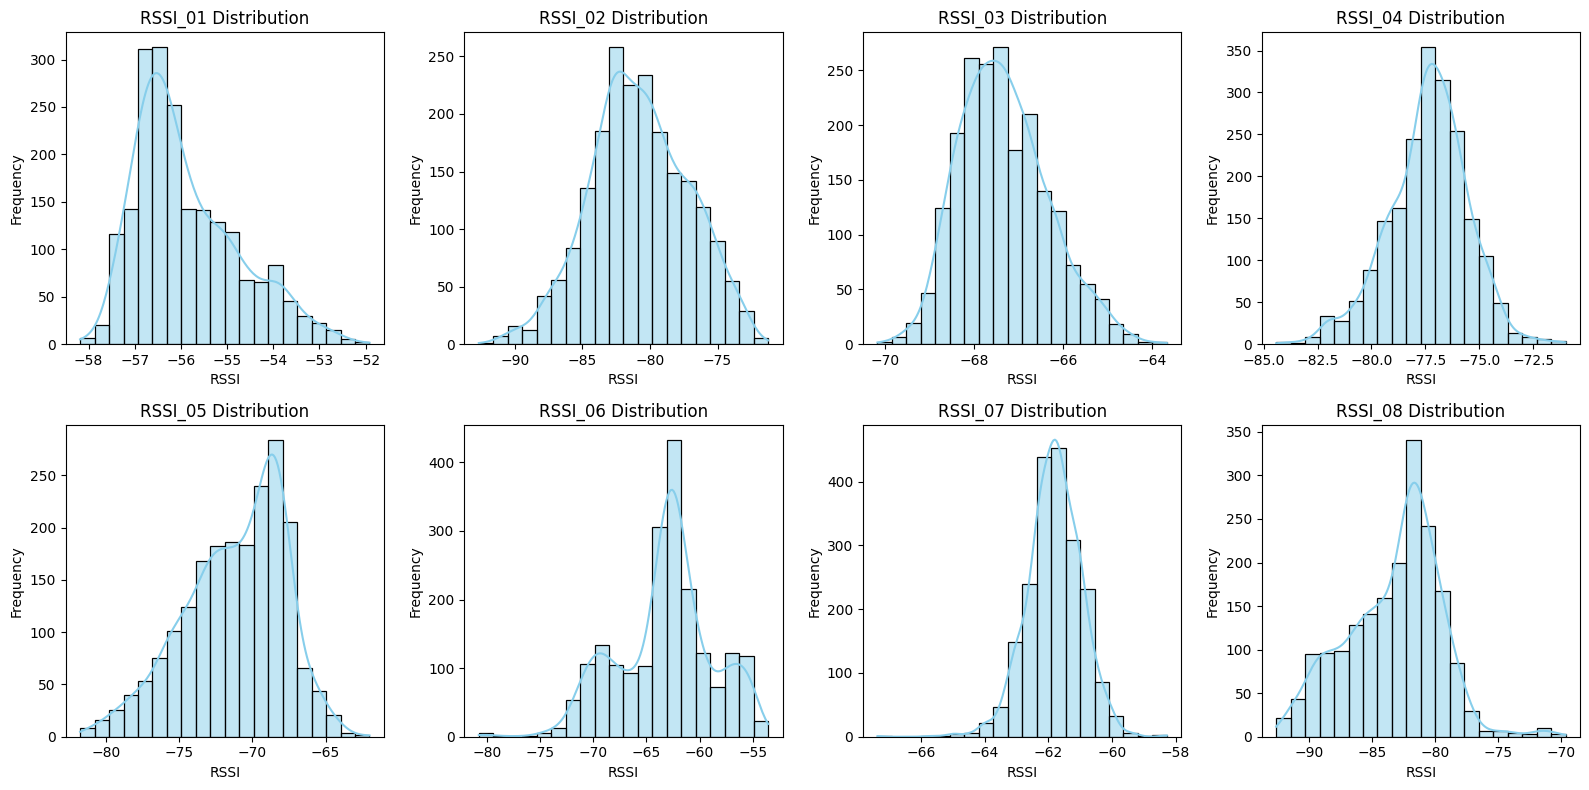

In [12]:
fig, axs = plt.subplots(2, 4, figsize=(16, 8))  # 2 rows, 4 columns

# Flatten the axs array for easier access
axs = axs.flatten()

# Plot each subplot
for i in range(8):
    sns.histplot(df[f'RSSI_0{i+1}'], bins=20, kde=True, color='skyblue', ax=axs[i])
    axs[i].set_title(f'RSSI_0{i+1} Distribution')
    axs[i].set_xlabel('RSSI')
    axs[i].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()


The temperature seems to follow a normal distribution, while RSSI measurements don't.
The non-normal distribution of RSSI measurements could indicate the presence of underlying factors affecting signal strength variability, such as interference, multipath effects, or environmental conditions.




## Geographic interpretation


In [13]:
coords_path = '/content/drive/MyDrive/EMM/emanueleg lora-rssi master vineyard-2021_data/nodes_coordinates.txt'
coords = pd.read_csv(coords_path, delimiter='\s+')
coords = coords.drop(0)
coords['brand/model'].iloc[0] = coords['(N)'].iloc[0]
coords['latitude'].iloc[0] = coords['longitude(E)'].iloc[0]
coords = coords.drop(['ID', 'device.1', '(N)', 'longitude(E)', 'gw_distance', '(m)'], axis=1)

coords = coords.rename(columns={
    'device': 'id',
    'brand/model': 'latitude',
    'latitude': 'longitude'
})

coords.head()



<ipython-input-13-2c7ca1042783>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coords['brand/model'].iloc[0] = coords['(N)'].iloc[0]
<ipython-input-13-2c7ca1042783>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coords['latitude'].iloc[0] = coords['longitude(E)'].iloc[0]


,id,latitude,longitude
1,gateway-01,44.821957,10.815304
2,tinovi-01,44.822073400339981,10.815745652887379
3,tinovi-02,44.823122175066679,10.81638157790559
4,tinovi-03,44.82457105755545,10.81725847759737
5,tinovi-04,44.82375277777778,10.81694166666667


In [14]:
import folium
from folium.plugins import HeatMap
import numpy as np

nodes = np.array(coords.drop(1).drop('id', axis=1))

map = folium.Map(location = nodes[6,], zoom_start = 19 )
folium.Marker([coords['latitude'].iloc[0], coords['longitude'].iloc[0]], icon=folium.Icon(color='lightgray', icon='home')).add_to(map)

i=1
for el in nodes:
  folium.Marker(el, popup=i).add_to(map)
  i=i+1

# HeatMap(nodes).add_to(map)
map



## Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression

cleaned_df = df.dropna()
print(f"Pre: {len(df)}, post: {len(cleaned_df)}")
print(f'# rows with missing values: {len(df)-len(cleaned_df)}')

Pre: 2029, post: 1877
# rows with missing values: 152


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

# Splitting the data into features (X) and target variable (y)
X = cleaned_df[['RSSI_01', 'RSSI_02', 'RSSI_03', 'RSSI_04', 'RSSI_05', 'RSSI_06', 'RSSI_07', 'RSSI_08']]
y = cleaned_df['temp']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

X_train_lr = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_lr)
results = model_sm.fit()
print(results.summary())

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f"\n\nMean Squared Error on test set: {mse:.4f}")


                            OLS Regression Results                            
Dep. Variable:                   temp   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     215.4
Date:                Mon, 05 Feb 2024   Prob (F-statistic):          1.96e-242
Time:                        13:05:13   Log-Likelihood:                -3295.2
No. Observations:                1501   AIC:                             6608.
Df Residuals:                    1492   BIC:                             6656.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -119.6992      5.955    -20.102      0.0

The R-squared value of 0.536 indicates that approximately 53.6% of the variability in the temperature can be explained by the independent variables included in the model. The model provides a moderate level of explanatory power, but there is still room for improvement in capturing the variability of the temperature data

The coefficients represent the estimated change in the temperature for a one-unit change in the corresponding RSSI value, holding other variables constant.
For example, for RSSI_01, a one-unit increase in RSSI_01 is associated with a decrease in temperature by approximately 0.817 units, all else being equal.

In this model, all RSSI variables have p-values less than 0.05, indicating that they are statistically significant predictors of temperature.

## Using Neural Networks

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
def create_mlp(input_shape):
    model = Sequential([
        Dense(32, activation='relu', input_shape=input_shape),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1)  # Output layer, predicting temperature
    ])
    return model

# Instantiate the model
input_shape = (8,)

tf.random.set_seed(42)
mlp_model = create_mlp(input_shape)

# Compile the model
mlp_model.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
mlp_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 961 (3.75 KB)
Trainable params: 961 (3.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train)

# Fit the MLP model
mlp_history = mlp_model.fit(X_scaled, y_train, epochs=350, batch_size=32, verbose=0)

# Evaluate the MLP model
X_test_scaled = scaler.transform(X_test)
mlp_loss = mlp_model.evaluate(X_test_scaled, y_test)

print("MLP Test MSE:", mlp_loss)


12/12 [==============================] - 0s 3ms/step - loss: 2.9024
MLP Test MSE: 2.902418375015259


We can compare the two models with the MSE computed on the test set.

As we can see, the MLP seems to perform better. The downsight of using such model is that we cannot interpret the result and give meaningful explanation with respect to statistical models such as OLS.

However, a better performance and fit of the model could mean, especially in our case, that could exist a non-linear correlation between RSSI and temperature which is better captured by deep neural networks.

In [19]:
from sklearn.metrics import mean_absolute_error
mlp_fitted = mlp_model.predict(X_test_scaled)
print(f"\nMAE (OLS): {mean_absolute_error(y_pred, y_test)}")
print(f"\nMAE (MLP): {mean_absolute_error(mlp_fitted, y_test)}")

12/12 [==============================] - 0s 3ms/step

MAE (OLS): 1.712326970278608

MAE (MLP): 1.3045590136210756


## Conclusion


In conclusion, our study delved into exploring the correlation between RSSI measurements from LoRaWAN nodes and ambient temperature. Through comprehensive analysis of a rich dataset encompassing over 2000 hourly RSSI readings and corresponding temperature data, we unearthed intriguing insights.

Our preliminary examination revealed distinctive patterns in both RSSI signals and temperature values. Notably, we observed variations in signal strengths across different nodes, with temperature exhibiting a normal distribution pattern. Moreover, the inverse relationship between temperature and RSSI strength emerged as a notable finding, indicating that colder temperatures tend to favor stronger signal propagation.

Further analysis using Ordinary Least Squares (OLS) regression and Neural Networks allowed us to delve deeper into this relationship. The OLS model provided valuable insights, demonstrating statistically significant correlations between RSSI readings and temperature. Meanwhile, the Neural Network model, with its superior predictive performance, hinted at the presence of potentially complex, non-linear correlations between the two variables.

However, I think there's still room to improve and to understand deeply the relationship between temperature and RSSI.
We could expand the analysis to include other environmental factors such as humidity, precipitation, and atmospheric pressure. Investigating the combined effects of these variables alongside temperature could offer a more comprehensive understanding of their influence on signal propagation. On the predictive side, we could employ more advanced machine learning techniques to improve performances. We may think about explainable systems to achieve an explanation of complex patterns captured by AI systems.